In [2]:
# Import needed tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Read datasets
df_top100 = pd.read_csv('top100.csv')
df_spotify = pd.read_csv('dataset_Spotify_usable.csv')

# Spotify Top 100 Analysis
#### John Funk
## Top 100 Genre Pie Graph
Below you will see a pie graph displaying Top 100 songs by genre.

<AxesSubplot: ylabel='genre'>

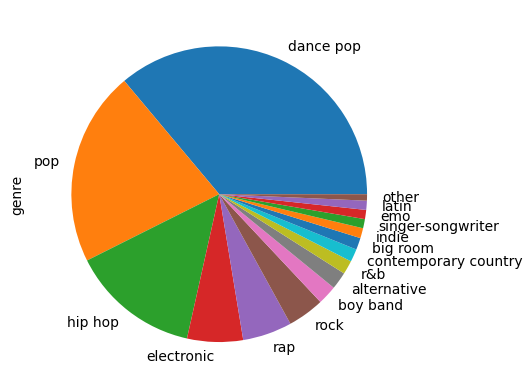

In [4]:
# Pie chart for genres
df_top100.genre.value_counts().plot(kind='pie')

In [5]:
# Define functions for tempo range chart
def count_tempos():
    count_u81 = 0
    count_81_100 = 0
    count_101_120 = 0
    count_121_140 = 0
    count_141_160 = 0
    count_o160 = 0
    
    for i, row in df_top100.iterrows():
        if (row['tempo'] < 81):
            count_u81+=1
        elif (81 <= row['tempo'] < 101):
            count_81_100+=1
        elif (101 <= row['tempo'] < 121):
            count_101_120+=1
        elif (121 <= row['tempo'] < 141):
            count_121_140+=1
        elif (141 <= row['tempo'] < 161):
            count_141_160+=1
        else:
            count_o160+=1
    
    tempo_counts = [count_u81, count_81_100, count_101_120, count_121_140, count_141_160, count_o160]
    return tempo_counts

def tempo_ranges():
    x_axis = ['<81','81-100','101-120','121-140','141-160','>160']
    y_axis = count_tempos()
    
    plt.bar(x_axis,y_axis)
    #plt.title('the ', metric, ' plot')
    plt.xlabel('tempo range')
    plt.ylabel('number of songs')
    plt.show()

## Top 100 Tempo Ranges
Below you will see a bar graph showing the number of Top 100 songs by tempo range.

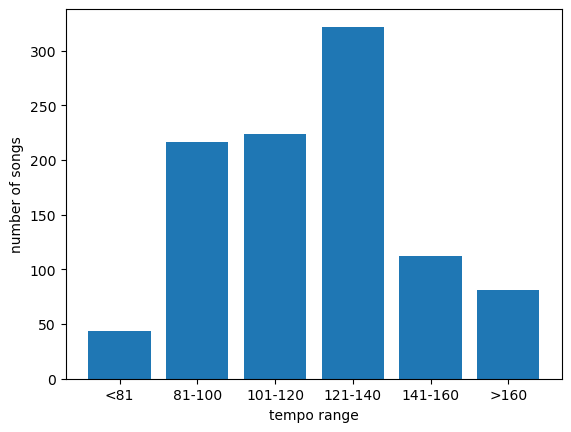

In [6]:
tempo_ranges()

In [7]:
# Define functions for metric trend lines

def column_average(column_name, year):
    row_sum = 0
    row_count = 0
    row_average = 0
    for i, row in df_top100.iterrows():
        if (row['top_year'] == year):
            row_count+=1
            row_sum = row_sum + row[column_name]
    row_average = row_sum/row_count
    return row_average

def average_metric(chosen_metric):
    average_array = [0,1,2,3,4,5,6,7,8,9]
    for i in range(10):
        year = i + 2010
        average_array[i] = column_average(chosen_metric,year)
    return average_array

def metric_over_time(metric):
    x_axis = [2010, 2011, 2012, 2013, 2014, 2015,2016,2017,2018,2019]
    y_axis = average_metric(metric)

    plt.plot(x_axis,y_axis)
    #plt.title('the ', metric, ' plot')
    plt.xlabel('year')
    plt.ylabel(metric)
    plt.show()

## Top 100 Metric Line Graph
Below you will see a line graph showing the average value of the chosen metric over time. To choose a metric, select from the drop down box.

In [8]:
widgets.interact(metric_over_time, metric=['tempo',
                                           'energy',
                                           'danceability',
                                           'loudness',
                                           'liveness',
                                           'valence',
                                           'duration',
                                           'acousticness',
                                           'speechiness'])

interactive(children=(Dropdown(description='metric', options=('tempo', 'energy', 'danceability', 'loudness', '…

<function __main__.metric_over_time(metric)>

In [9]:
# Prepare data for model

x = df_spotify.drop('top100', axis=1)
y = df_spotify['top100']

# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [10]:
# Create, train, and evaluate model

predictor = RandomForestClassifier()
predictor.fit(x_train.values, y_train)
predictor.score(x_test.values, y_test);

In [11]:
duraw = widgets.BoundedFloatText(
    value=500000,min=0.1,max=6000000,step=1000,
    description='Duration (0-6,000,000):',style = {'description_width': 'initial'},
    disabled=False
)
dancw = widgets.BoundedFloatText(
    value=10,min=0.1,max=100,step=1,
    description='Danceability (1-100):',style = {'description_width': 'initial'},
    disabled=False
)
enerw = widgets.BoundedFloatText(
    value=10,min=0.1,max=100,step=1,
    description='Energy (1-100):',style = {'description_width': 'initial'},
    disabled=False
)
loudw = widgets.BoundedFloatText(
    value=-7,min=-47,max=3,step=1,
    description='Loudness (-47-3):',style = {'description_width': 'initial'},
    disabled=False
)
speew = widgets.BoundedFloatText(
    value=10,min=0.1,max=100,step=1,
    description='Speechiness (1-100):',style = {'description_width': 'initial'},
    disabled=False
)
acouw = widgets.BoundedFloatText(
    value=10,min=0.1,max=100,step=1,
    description='Acousticness (1-100):',style = {'description_width': 'initial'},
    disabled=False
)
livew = widgets.BoundedFloatText(
    value=10,min=0.1,max=100,step=1,
    description='Liveness (1-100):',style = {'description_width': 'initial'},
    disabled=False
)
valew = widgets.BoundedFloatText(
    value=10,min=0.1,max=100,step=1,
    description='Valence (1-100):',style = {'description_width': 'initial'},
    disabled=False
)
tempw = widgets.BoundedFloatText(
    value=200,min=0.1,max=250,step=10,
    description='Tempo (ms):',style = {'description_width': 'initial'},
    disabled=False
)
   
def user_input():
    display(duraw,dancw,enerw,loudw,speew,acouw,livew,valew,tempw)    
    
    def on_button_clicked(b):
        with output:
            user_test = [[duraw.value,(dancw.value/100),
                          (enerw.value/100),loudw.value,
                          (speew.value/100),
                          (acouw.value/100),
                          (livew.value/100),
                          (valew.value/100),
                          tempw.value]]
            user_predict = predictor.predict(user_test)
            print('User chosen values: ',user_test)
            if user_predict == 1:
                print('This song will make the Spotify Top 100')
            else:
                print('This song will not make the Spotify Top 100')
            
    button = widgets.Button(description="Predict!")
    output = widgets.Output()
    button.on_click(on_button_clicked)
    display(button, output)

## Top 100 Predictor Tool
Below you will see the predictor tool for Top 100 songs. Please input your chosen values for each metric and click the "Predict!" button.

In [12]:
user_input()

BoundedFloatText(value=500000.0, description='Duration (0-6,000,000):', max=6000000.0, min=0.1, step=1000.0, s…

BoundedFloatText(value=10.0, description='Danceability (1-100):', min=0.1, step=1.0, style=DescriptionStyle(de…

BoundedFloatText(value=10.0, description='Energy (1-100):', min=0.1, step=1.0, style=DescriptionStyle(descript…

BoundedFloatText(value=-7.0, description='Loudness (-47-3):', max=3.0, min=-47.0, step=1.0, style=DescriptionS…

BoundedFloatText(value=10.0, description='Speechiness (1-100):', min=0.1, step=1.0, style=DescriptionStyle(des…

BoundedFloatText(value=10.0, description='Acousticness (1-100):', min=0.1, step=1.0, style=DescriptionStyle(de…

BoundedFloatText(value=10.0, description='Liveness (1-100):', min=0.1, step=1.0, style=DescriptionStyle(descri…

BoundedFloatText(value=10.0, description='Valence (1-100):', min=0.1, step=1.0, style=DescriptionStyle(descrip…

BoundedFloatText(value=200.0, description='Tempo (ms):', max=250.0, min=0.1, step=10.0, style=DescriptionStyle…

Button(description='Predict!', style=ButtonStyle())

Output()